In [18]:
# !pip install seaborn

In [15]:
import pymysql
import pymysql.cursors
import config
import pandas as pd
import seaborn as sns

In [16]:
import sqlalchemy

In [17]:
sns.set()

In [18]:
connection = pymysql.connect(host=config._mysql_host,
                             user=config._mysql_user,
                             password=config._mysql_password,
                             db=config._mysql_db,
                             port=config._mysql_port,
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [19]:
sql = '''
select clan_name, town_hall_level, count(*) as ct, avg(queen_level) as queen, avg(king_level) as king,
avg(warden_level) as warden
from player_stats_current p
left join clan_stats_current c on (p.clan_tag = c.clan_tag)
where
p.player_tag not in ('#8JGLVGRLP', '#PYQCRG022')
group by 1,2
order by 2 desc,3 desc;'''

In [20]:
with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()

In [10]:
df = pd.DataFrame(results)

In [11]:
df[(df['clan_name'] == 'For Aiur') & (df['town_hall_level'] == 11)]

,clan_name,ct,king,queen,town_hall_level,warden
15,For Aiur,4,32.7500,37.2500,11,9.0000


In [12]:
df.head()

,clan_name,ct,king,queen,town_hall_level,warden
0,For Aiur,8,37.1250,43.0000,12,19.0000
1,Aussie Outcasts,7,54.5714,55.5714,12,27.2857
2,Antygimbaza,7,46.5714,46.7143,12,20.8571
3,indian pirates,7,25.0000,33.8571,12,14.5714
4,~ New School ~,5,43.4000,45.6000,12,21.2000


In [13]:
from IPython.core.pylabtools import figsize

In [14]:
# df_big['']

In [15]:
df_big = df[df['town_hall_level'] >= 9]

In [16]:
df_big = df_big.sort_values(['town_hall_level','ct'], ascending=[False, False])

In [17]:
figsize(12, 7)

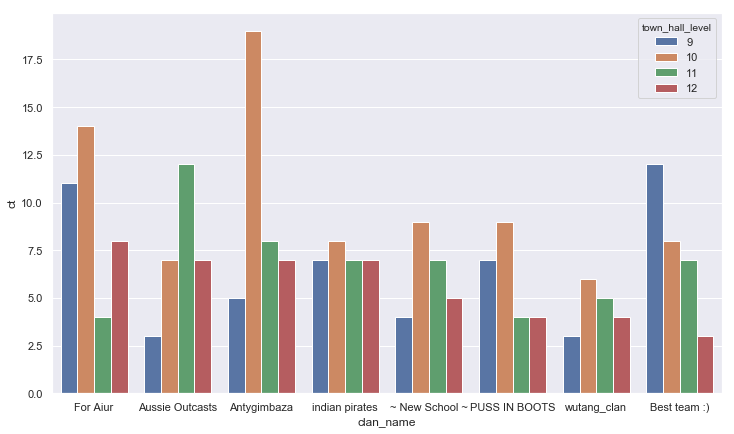

In [18]:
sns.barplot(x='clan_name', y='ct', hue='town_hall_level', data=df_big)

In [19]:
df_big = df_big.sort_values(['town_hall_level','queen'], ascending=[False, False])

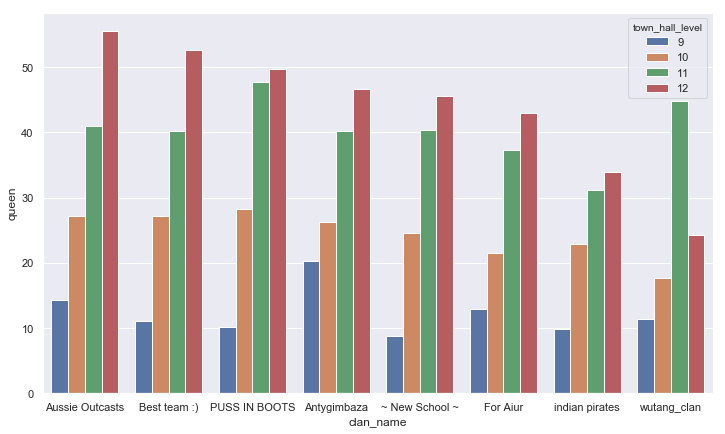

In [20]:
sns.barplot(x='clan_name', y='queen', hue='town_hall_level', data=df_big)

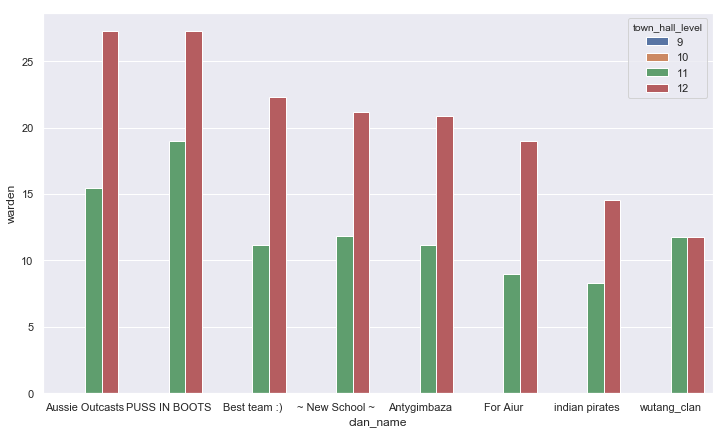

In [21]:
df_big = df_big.sort_values(['town_hall_level','warden'], ascending=[False, False])
sns.barplot(x='clan_name', y='warden', hue='town_hall_level', data=df_big)

In [22]:
sql = '''select p.*
from player_stats_current p
left join clan_stats_current c on (p.clan_tag = c.clan_tag) '''

In [23]:
with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()

In [24]:
df = pd.DataFrame(results)

In [25]:
df.columns

Index(['achv_th_destroyed', 'achv_total_donations', 'attack_wins',
       'battle_machine_Level', 'clan_tag', 'created_time', 'current_league',
       'current_trophies', 'defense_wins', 'donations_given',
       'donations_received', 'exp_level', 'king_level', 'player_id',
       'player_name', 'player_tag', 'queen_level', 'town_hall_level',
       'updated_time', 'war_stars', 'warden_level'],
      dtype='object')

In [26]:
df['warden_level'] = df['warden_level'].fillna(0)

In [27]:
df['total_levels'] = df['queen_level'] + df['king_level'] + df['warden_level']

In [28]:
df = df[df['town_hall_level'] >= 9]
# df = df[df['attack_wins'] > 0]

In [29]:
def get_clan_info(df, clan_tag):
    fa = df[df['clan_tag'] == clan_tag]
    fa_total_levels = fa.sort_values('total_levels', ascending=False)[:20].reset_index()
    fa_exp_level = fa.sort_values(['town_hall_level', 'exp_level'], ascending=[False, False])[:20].reset_index(drop=True)
    fy_sort = fa.sort_values(['town_hall_level','exp_level', 'total_levels'] , ascending=[False, False, False])[:20].reset_index()\
    [['player_name', 'town_hall_level', 'exp_level', 'queen_level', 'king_level', 'warden_level']]
    
    return fy_sort

In [30]:
for_aiur = get_clan_info(df, '#YUPCJJCR')

In [31]:
new_school = get_clan_info(df, '#VGLLPY0')

In [32]:
x = new_school.join(for_aiur, lsuffix='_ns', rsuffix='_fa').reset_index().rename(columns={'index':'war#'})

In [33]:
x['war#'] = x['war#']+1

In [34]:
x

,war#,player_name_ns,town_hall_level_ns,exp_level_ns,queen_level_ns,king_level_ns,warden_level_ns,player_name_fa,town_hall_level_fa,exp_level_fa,queen_level_fa,king_level_fa,warden_level_fa
0,1,guillaume,12,207,60.0,60.0,30.0,dana,12,215,55.0,50.0,23.0
1,2,dod,12,180,60.0,57.0,26.0,Pumclart,12,193,57.0,50.0,22.0
2,3,messi,12,167,49.0,40.0,30.0,Pums Revenge,12,189,58.0,50.0,20.0
3,4,#Ger,12,163,33.0,37.0,17.0,Cockers,12,188,45.0,35.0,30.0
4,5,#Ns.mega gogo,12,139,26.0,23.0,3.0,Syn,12,168,40.0,25.0,22.0
5,6,mat 2tens,11,171,46.0,40.0,12.0,andy,12,154,27.0,26.0,7.0
6,7,#Ns.EviloX,11,168,50.0,50.0,20.0,Cockers 2,12,152,33.0,33.0,16.0
7,8,OncleBOB,11,163,40.0,45.0,7.0,twintowers2,12,131,29.0,28.0,12.0
8,9,#Ns. Guillaume2,11,157,45.0,43.0,20.0,Troop Donator,11,168,50.0,46.0,18.0
9,10,#Ns. Christo,11,139,42.0,30.0,6.0,draco,11,139,29.0,27.0,7.0


In [35]:
new_school = get_clan_info(df, '#VGLLPY0')

In [36]:
for_aiur

,player_name,town_hall_level,exp_level,queen_level,king_level,warden_level
0,dana,12,215,55.0,50.0,23.0
1,Pumclart,12,193,57.0,50.0,22.0
2,Pums Revenge,12,189,58.0,50.0,20.0
3,Cockers,12,188,45.0,35.0,30.0
4,Syn,12,168,40.0,25.0,22.0
5,andy,12,154,27.0,26.0,7.0
6,Cockers 2,12,152,33.0,33.0,16.0
7,twintowers2,12,131,29.0,28.0,12.0
8,Troop Donator,11,168,50.0,46.0,18.0
9,draco,11,139,29.0,27.0,7.0


In [37]:
# df.groupby(['clan_tag', 'town_hall_level'])['queen_level', 'king_level', 'warden_level'].mean().reset_index()

In [38]:
sql = '''select clan_tag, clan_name from clan_stats_current '''

with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()
    clan_tags = [i['clan_tag'] for i in results]
    clan_name = [i['clan_name'] for i in results]

In [39]:
results

[{'clan_tag': '#90222JLR', 'clan_name': 'Antygimbaza'},
 {'clan_tag': '#PRUUUG0Y', 'clan_name': 'Aussie Outcasts'},
 {'clan_tag': '#VGLLPY0', 'clan_name': '~ New School ~'},
 {'clan_tag': '#2QVLQ0YY', 'clan_name': 'indian pirates'},
 {'clan_tag': '#LQ28YUCU', 'clan_name': 'Best team :)'},
 {'clan_tag': '#PLYGV9P0', 'clan_name': 'wutang_clan'},
 {'clan_tag': '#8LL2C92R', 'clan_name': 'PUSS IN BOOTS'},
 {'clan_tag': '#YUPCJJCR', 'clan_name': 'For Aiur'}]

In [40]:
stack=[]
for i in range(len(clan_tags)):
    temp_df = get_clan_info(df, clan_tags[i])
    temp_df['clan_name'] = clan_name[i]
    stack.append(temp_df)

In [62]:
stack_1 = stack[1]

In [63]:
stack_1 = stack_1.reset_index().rename(columns={'index':'war#'})

In [64]:
stack_1['war#'] = stack_1['war#'] + 1

In [65]:
stack_1[:15]

,war#,player_name,town_hall_level,exp_level,queen_level,king_level,warden_level,clan_name
0,1,MJ,12,203,60.0,60.0,30.0,Aussie Outcasts
1,2,Mighty Mouse,12,199,54.0,51.0,21.0,Aussie Outcasts
2,3,Kev,12,198,60.0,60.0,30.0,Aussie Outcasts
3,4,Lady Jane,12,192,60.0,60.0,30.0,Aussie Outcasts
4,5,Snake Plissken,12,190,60.0,58.0,30.0,Aussie Outcasts
5,6,Guinea,12,184,52.0,48.0,30.0,Aussie Outcasts
6,7,rick,12,169,43.0,45.0,20.0,Aussie Outcasts
7,8,SickBoy,11,171,50.0,50.0,20.0,Aussie Outcasts
8,9,balks77,11,168,40.0,33.0,16.0,Aussie Outcasts
9,10,Twistyville,11,162,44.0,42.0,14.0,Aussie Outcasts


In [156]:
total_exp = []
for clan in stack:
    clan_dict = {}
    clan = clan[:15]
    clan_dict['clan_name'] = clan['clan_name'].unique()[0]
    clan_dict['clan_exp'] = clan['exp_level'].sum()
    total_exp.append(clan_dict)

In [157]:
sorted(total_exp, key = lambda i: i['clan_exp'], reverse=True) 

[{'clan_name': 'Aussie Outcasts', 'clan_exp': 2627},
 {'clan_name': 'Antygimbaza', 'clan_exp': 2457},
 {'clan_name': 'indian pirates', 'clan_exp': 2403},
 {'clan_name': 'Best team :)', 'clan_exp': 2376},
 {'clan_name': 'PUSS IN BOOTS', 'clan_exp': 2376},
 {'clan_name': '~ New School ~', 'clan_exp': 2350},
 {'clan_name': 'For Aiur', 'clan_exp': 2273},
 {'clan_name': 'wutang_clan', 'clan_exp': 2013}]

In [22]:
sql = '''select * from player_stats_historic '''

with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()

In [25]:
df = pd.DataFrame(results)

In [14]:
from app.compute import player_stats

In [27]:
player_stats.PlayerStats(df).get_improvement_message('attack_wins', player_name='swedish sailor')

'Swedish Sailor changed 11 in attack_wins'